In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
z = np.zeros(4)
print(z, ' shape: ', z.shape)

[ 0.  0.  0.  0.]  shape:  (4,)


In [3]:
a = np.random.randn(2, 3) * 10
print(a, ' shape: ', a.shape)

[[-12.03483731   2.11039163 -17.00551938]
 [  5.92935466 -20.11390534 -17.61213855]]  shape:  (2, 3)


In [4]:
a_mask = a>0
print(a_mask)
print(a_mask.shape)
sum_a = np.sum(a, axis=1)
print(sum_a)
print(sum_a.shape)
print(np.array([sum_a]).T)
print (a_mask / np.array([sum_a]).T)

[[False  True False]
 [ True False False]]
(2, 3)
[-26.92996506 -31.79668923]
(2,)
[[-26.92996506]
 [-31.79668923]]
[[-0.         -0.03713336 -0.        ]
 [-0.03144982 -0.         -0.        ]]


In [9]:
print(a)
print(np.power(a,2))
b = a * a
print(np.sum(b))

[[-12.03483731   2.11039163 -17.00551938]
 [  5.92935466 -20.11390534 -17.61213855]]
[[ 144.83730908    4.45375282  289.18768937]
 [  35.15724671  404.56918793  310.18742431]]
1188.39261023


In [3]:
import h5py
import tables

In [6]:
arrays = []
with h5py.File('./metu/dataset/Part_1.mat', 'r') as f:
    root = f['Part_1']
    ref1 = root[0][0]
    data = f[ref1]
    print(data)

<HDF5 dataset "b": shape (61000, 3), type "<f8">


In [7]:
file = tables.open_file('./metu/dataset/Part_1.mat')
root = file.root

In [8]:
#print(root.Part_1)
array = root.Part_1[0][0]
dataSet = root.Part_1
print(root.Part_1.shape[0])
print(dataSet.shape)
print(dataSet[1].shape)

3000
(3000, 1)
(1,)


In [9]:
print(dataSet[2][0][0].shape)

(50000, 3)


In [11]:
data = dataSet[2][0][0]
print(data[:,0].shape)

(50000,)


In [4]:
ppg_ind = 0
abg_ind = 1

X = []
Y = []

file_pt = tables.open_file('./metu/dataset/Part_1.mat')
data_heap = file_pt.root.Part_1
train_size = data_heap.shape[0]
for ind in range(train_size):
    data = data_heap[ind][0][0]
    X.append(data[:,ppg_ind])
    Y.append(data[:,abg_ind])
X = np.array(X)
Y = np.array(Y)

In [13]:
print(X[1])
print(Y.shape)

[ 2.40957967  2.32942326  2.23851417 ...,  1.24046921  1.23069404
  1.21994135]
(3000,)


In [2]:
from scipy import signal
wavelet = signal.ricker
widths = np.arange(1, 11)

In [17]:
idx = 5
window = 1000
widths = np.arange(1, 50)
inds1 = signal.find_peaks_cwt(Y[idx][:window], widths)
inds2 = signal.find_peaks_cwt(-Y[idx][:window], widths)
print(np.array([inds2]).shape, np.array([inds1]).shape)
mean1 = np.mean(Y[idx][inds1])
mean2 = np.mean(Y[idx][inds2])
print(mean1, mean2)

(1, 14) (1, 15)
144.77066879 70.9530391848


In [22]:
signal_size = X[idx].shape[0]
print(signal_size)

(21000,)


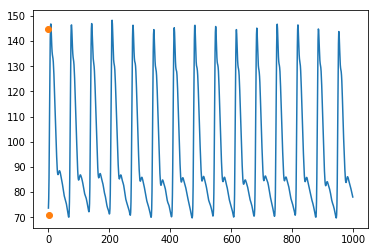

In [16]:
plt.plot(Y[idx][:window])
plt.plot([mean1,mean2], 'o')
plt.show()

In [9]:
file_pt.close()

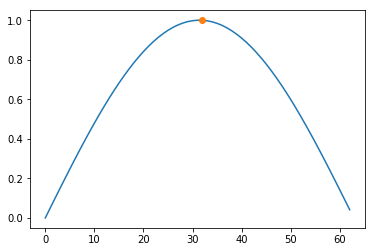

In [45]:
plt.plot(data)
plt.plot(peakind, data[peakind], 'o')
plt.show()